---

# CSCI 3202, Fall 2023
# Homework 4.1
# Total: 65 pts
# Due: October 23 at 11:59 pm

<br> 

### Your name: Derick Sayavong

<br> 

#### Setting up aima-python repo
* Follow the steps outlined in the README file here
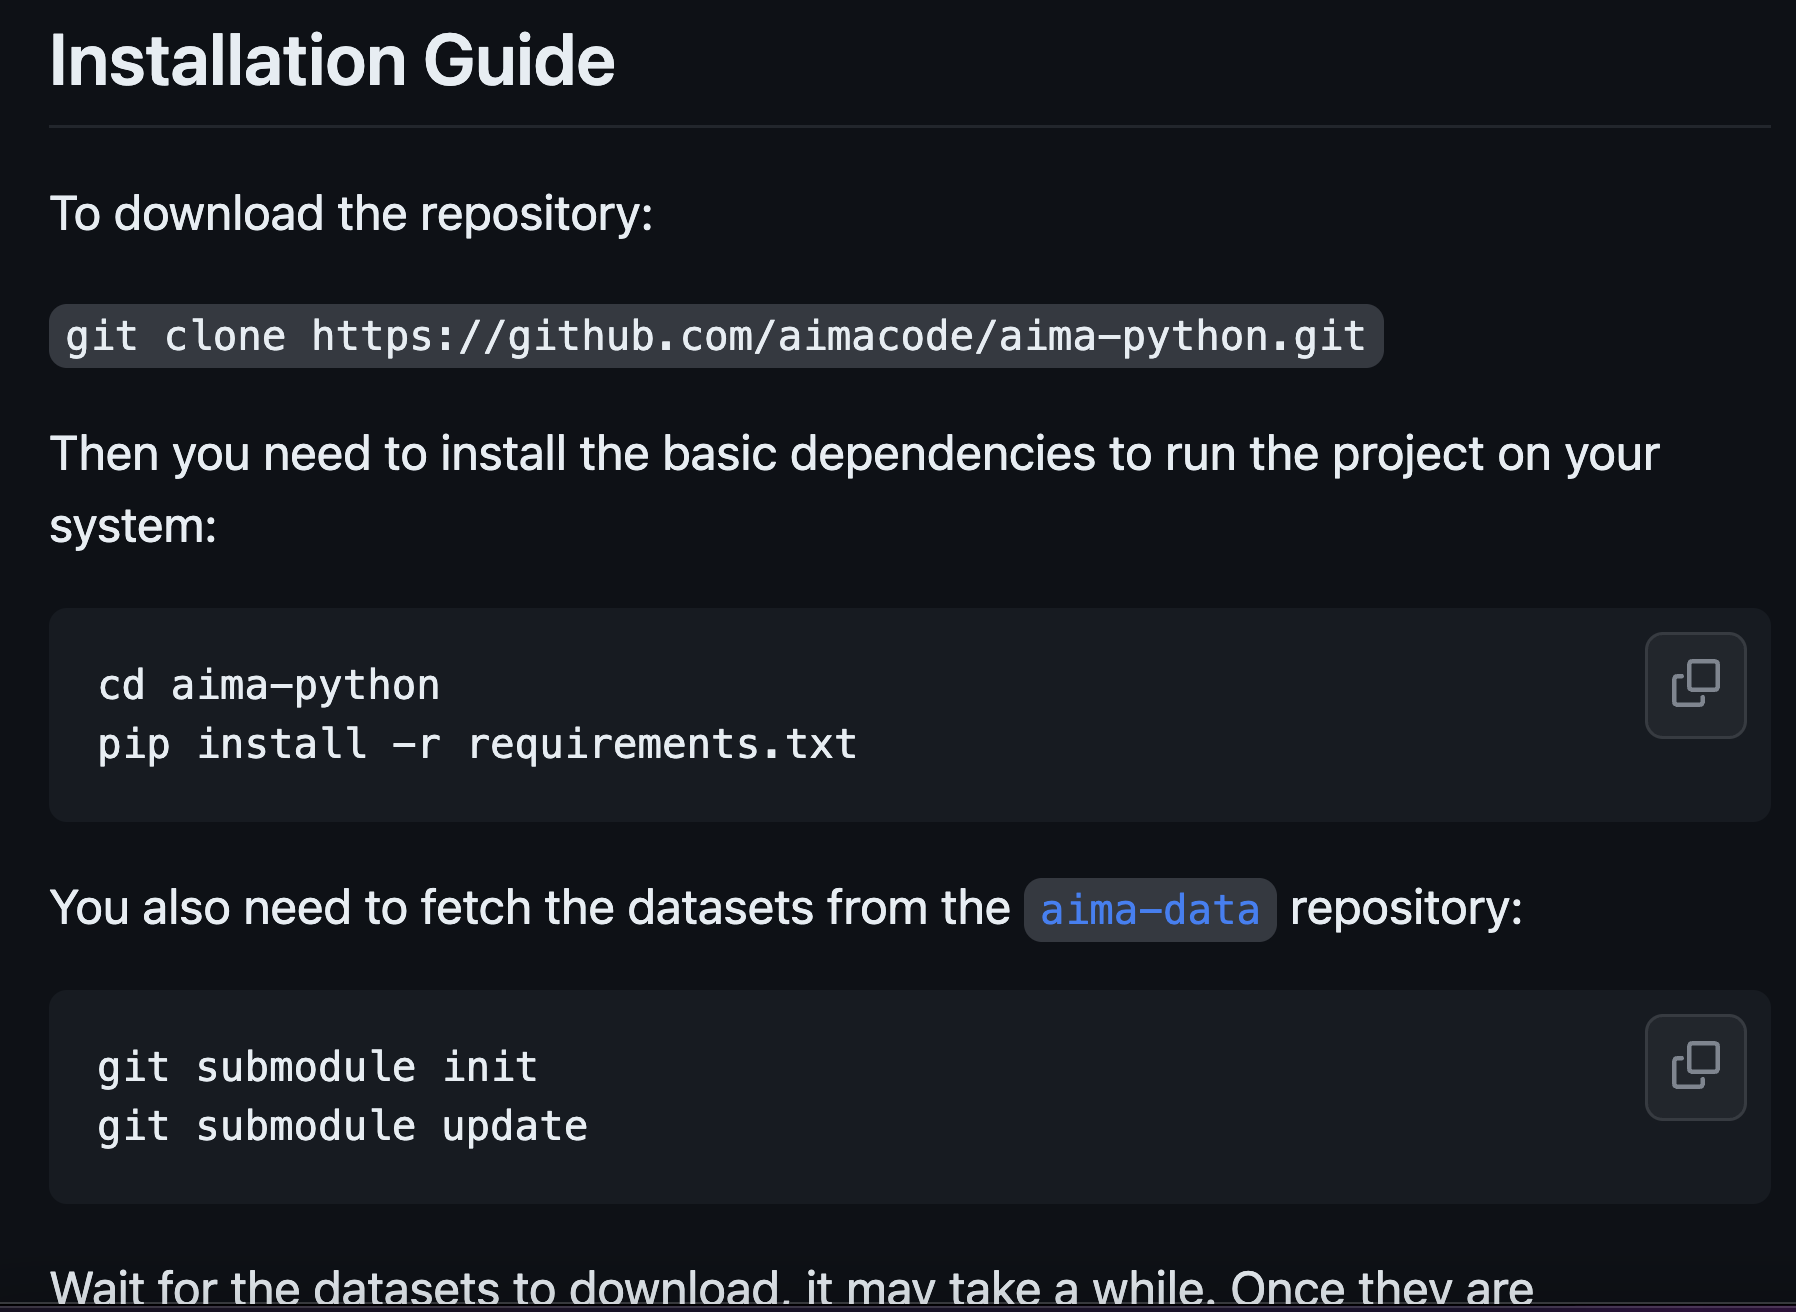

In [1]:
from probability import *
from utils import print_table
from notebook import psource, pseudocode, heatmap

In this homework, we will be working with Bayes Nets. We will solve a Bayesian network problem, initially on paper and then using [probability](https://github.com/aimacode/aima-python/blob/master/probability.py) module from [aima-python](https://github.com/aimacode/aima-python) repository.

### Problem 1: Solve on paper

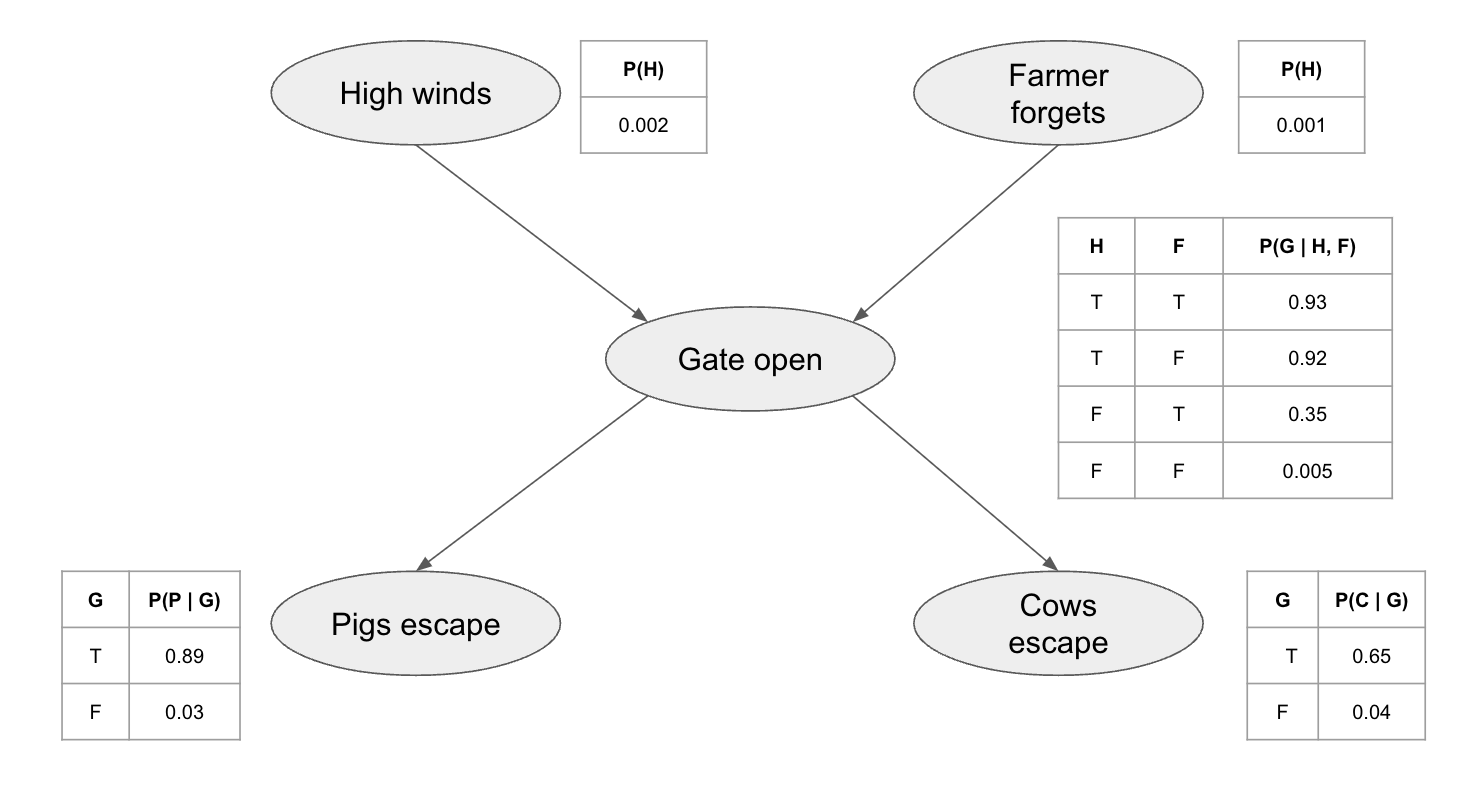

#### If the above diagram, isn't showing up for you in the notebook, please refer to p1.png

The above given problem is a Bayesian network, where we have two nodes with no parents - _high winds_ and _farmer forgets_ to close the gate. We have one node with two parents - _gate open_ which leads to two children. The two children are _pigs escape_ and _cows escape_. Now, given this network, solve the questions below as specified.

You may refer to the [probability module](https://github.com/aimacode/aima-python/blob/master/probability.py) and the [probability notebook](https://github.com/aimacode/aima-python/blob/master/probability.ipynb) (with more explanations) in the aima-python repository.

### Questions:

1.1 Probability that the gate is open? - **5 pts**

<img src="Hw41.1.jpg" />

1.2 Probability that pigs escape? - **5 pts**

<img src="Hw41.2.jpg" />

1.3 Probability that cows escape? - **5 pts**

<img src="Hw41.3.jpg" />

### Solve through code - 

### Problem 2

<img src="files/images/bayesnet.png">

#### If the above diagram, isn't showing up for you in the notebook, please refer to p2.png

For the above diagram, we have defined the Bayes Network as below.

In [2]:
T, F = True, False

burglary_net = BayesNet([
    ('Burglary', '', 0.001),
    ('Earthquake', '', 0.002),
    ('Alarm', ['Burglary', 'Earthquake'],
     {(T, T): 0.95, (T, F): 0.94, (F, T): 0.29, (F, F): 0.001}),
    ('JohnCalls', 'Alarm', {T: 0.90, F: 0.05}),
    ('MaryCalls', 'Alarm', {T: 0.70, F: 0.01})
])
print(burglary_net.variables) # prints out all nodes present in the BayesNet

['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']


In [3]:
psource(enumeration_ask)

Example 1. Probability that John calls given burglary is True

In [4]:
# With definition of the function given above, X is the variable whose value we are looking for, 
# and e is the evidence we know

# In this problem, we are looking for the probability that John calls (X) given burglary is True (e)
# If you notice below, we add the [True] to the function, this is because enumeration_ask returns a type of dictionary
# whose keys are possible values of the variable X (True, False)

enumeration_ask('JohnCalls', {'Burglary': T}, burglary_net)[True]

0.849017

Example 2. Probability that John calls

In [5]:
enumeration_ask('JohnCalls', {}, burglary_net)[True]

0.0521389757

### Questions:

2.1 Probability of an earthquake given mary calls - **5 pts**

In [16]:
enumeration_ask('Earthquake', {'MaryCalls': T}, burglary_net)[True]

0.03588091528645573

2.2 Probability that John and Mary both call given burglary is set to True - **5 pts** \
_Hint_: John and Mary calling are independent events

In [27]:
enumeration_ask('MaryCalls', {"Burglary": T}, burglary_net)[True]  * enumeration_ask('JohnCalls', {"Burglary":T}, burglary_net)[True]

0.5591743126345999

2.3 Probability that either John or Mary call given there's a burglary (burglary is set to True) - **10 pts** \
_Hint_: P(A or B) = P(A) + P(B) - P(A and B)

In [31]:
enumeration_ask('MaryCalls', {"Burglary": T}, burglary_net)[True]  + enumeration_ask('JohnCalls', {"Burglary":T}, burglary_net)[True] - (enumeration_ask('MaryCalls', {"Burglary": T}, burglary_net)[True]  * enumeration_ask('JohnCalls', {"Burglary":T}, burglary_net)[True])

0.9484564873653999

### Problem 3 

#### Use the figure from Problem 1 for this section

Construct the BayesNet below

BayesNet can be initialised by passing it a list of tuples of the form - (X, parents of X, cpt table) \
where X is the node name, \
parents of X must be either in a space separated string or a list of strings \
cpt table is the table provided in the diagram above for each node

Nodes must be ordered with parents before children. \
Please make note that if you have whitespaces in the node names, the BayesNet functions wont work, so use 'High_winds' rather than 'High winds' as node names

In [33]:
T, F = True, False

gate_net = BayesNet([
    ('High_winds', '', 0.002),
    ('Farmer_forgets', '', 0.001),
    ('Gate_open', ['High_winds', 'Farmer_forgets'],
     {(T, T): 0.93, (T, F): 0.92, (F, T): 0.35, (F, F): 0.005}),
    ('Pigs_escape', 'Gate_open', {T: 0.89, F: 0.03}),
    ('Cows_escape', 'Gate_open', {T: 0.65, F: 0.04})
])
print(gate_net.variables) # prints out all nodes present in the BayesNet

['High_winds', 'Farmer_forgets', 'Gate_open', 'Pigs_escape', 'Cows_escape']


### Questions:

3.1 Probability that cows escaped given high winds is true? - **5 pts**

In [34]:
enumeration_ask('Cows_escape', {'High_winds': T}, gate_net)[True]

0.6012061000000001

3.2 Probability that pigs escape given farmer forgets to close the gate? - **5 pts**

In [36]:
enumeration_ask('Pigs_escape', {'Farmer_forgets': T}, gate_net)[True]

0.33199760000000006

3.3 Probability that you have high winds given the pigs have escaped? - **5 pts**

In [38]:
enumeration_ask('High_winds', {'Pigs_escape': T}, gate_net)[True]

0.04540836771129721

3.4 Probability that the farmer forgot to close the gate, and both the pigs and cows have escaped? - **5 pts**

In [39]:
enumeration_ask('Farmer_forgets', {'Pigs_escape': T, 'Cows_escape': T}, gate_net)[True]

0.038175695734616766

3.5 Probability that the cows or pigs have escaped, given the farmer forgets is True? - **10 pts**

In [43]:
enumeration_ask('Pigs_escape', {'Farmer_forgets': T}, gate_net)[True] + enumeration_ask('Cows_escape', {'Farmer_forgets': T}, gate_net)[True] - (enumeration_ask('Pigs_escape', {"Farmer_forgets": T}, gate_net)[True]  * enumeration_ask('Cows_escape', {"Farmer_forgets":T}, gate_net)[True])

0.50180888689824

### Answers to some of the problems:

#### Problem 1:
- **1.1** - 0.00717
- **1.3** - 0.04437

#### Problem 2:
- **2.1** - 0.03588091528645573
- **2.3** - 0.9484564873653999

#### Problem 3:
- **3.1** - 0.6012061000000001
- **3.3** - 0.04540836771129721
- **3.5** - 0.50180888689824
